In [1]:
import os
import sys
import shutil
import glob
from pathlib import Path

import numpy as np
import librosa
import matplotlib.pyplot as plt

repos_dir = r'/home/akikun/repos'
sys.path.append(repos_dir)
from sak import display as dp

imgan_dir = os.path.join(repos_dir, 'Intelligibility-MetricGAN')
sys.path.append(imgan_dir)
import audio_util as au

from sak import signal_processing as sp

In [8]:
# check iMetricGAN sample files.
wav_dir = os.path.join(imgan_dir, 'database')
for path in Path(wav_dir).rglob('*.wav'):
    print(path)
    dp.disp_wav(path)
    rms = sp.get_rms(sp.load_wav(path))
    print('rms: {}'.format(np.mean(rms)))

/home/akikun/repos/Intelligibility-MetricGAN/database/Train/Clean/Train_1.wav


rms: 0.01658816449344158
/home/akikun/repos/Intelligibility-MetricGAN/database/Train/Clean/Train_2.wav


rms: 0.015156207606196404
/home/akikun/repos/Intelligibility-MetricGAN/database/Train/Noise/Train_1.wav


rms: 0.11129654198884964
/home/akikun/repos/Intelligibility-MetricGAN/database/Train/Noise/Train_2.wav


rms: 0.11133115738630295
/home/akikun/repos/Intelligibility-MetricGAN/database/Train/MultiEnh/Train_1.wav


rms: 0.018989190459251404
/home/akikun/repos/Intelligibility-MetricGAN/database/Train/MultiEnh/Train_2.wav


rms: 0.018155746161937714
/home/akikun/repos/Intelligibility-MetricGAN/database/Test/Clean/Train_1.wav


rms: 0.01658816449344158
/home/akikun/repos/Intelligibility-MetricGAN/database/Test/Clean/Train_2.wav


rms: 0.015156207606196404
/home/akikun/repos/Intelligibility-MetricGAN/database/Test/Noise/Train_1.wav


rms: 0.11129654198884964
/home/akikun/repos/Intelligibility-MetricGAN/database/Test/Noise/Train_2.wav


rms: 0.11133115738630295


In [3]:
# iMetricGAN samples.
wav_imgan_path = r'/home/akikun/repos/Intelligibility-MetricGAN/database/Train/Clean/Train_2.wav'

# hikari tts samples.
wav_hikari_dir = r'/home/common/db/audio_corpora/nele/hikari_tts/wavs'
wav_hikari_paths = glob.glob(os.path.join(wav_hikari_dir, '*.wav'))
wav_hikari_path = wav_hikari_paths[0]

wav_imgan  = sp.load_wav(wav_imgan_path)
wav_hikari = sp.load_wav(wav_hikari_path)

print('iMetricGAN')
dp.disp_wav(wav_imgan_path)
print('Hikari')
dp.disp_wav(wav_hikari_path)

iMetricGAN


Hikari


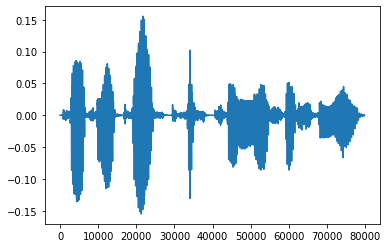

In [4]:
#mag, phase = au.Sp_and_phase(wav, Normalization=True)
#sig_in = mag.reshape(1, mag.shape[0], -1)
plt.plot(wav_imgan)

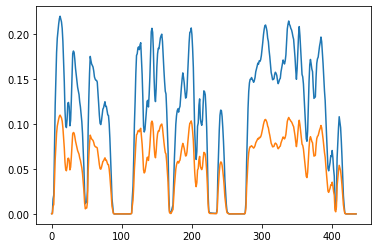

In [5]:
rms_imgan  = sp.get_rms(wav_imgan)
rms_hikari = sp.get_rms(wav_hikari)

wav_hikari2 = wav_hikari/2
rms_hikari2 = sp.get_rms(wav_hikari2)
plt.plot(rms_hikari)
plt.plot(rms_hikari2)

0.02


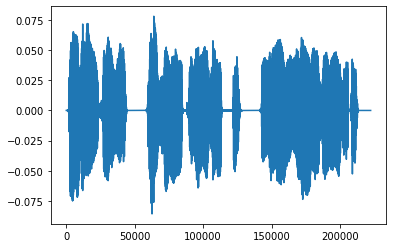

In [6]:
rms = rms_hikari
rms_target = 0.05
wav_in_path  = wav_hikari_path
wav_out_path = 'wav_hikari_normalized.wav'

sp.normalize_rms_file(wav_in_path, wav_out_path)
wav_out = sp.load_wav(wav_out_path)
plt.plot(wav_out)

rms_ = sp.get_rms(wav_out)
print(np.mean(rms_[np.nonzero(rms_)]))
dp.disp_wav(wav_out_path)